In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [4]:
df = pd.read_csv("game data.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [5]:
df.isnull().sum()

Days            0
Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [6]:
df.drop('Days',axis=1, inplace=True)
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [7]:
x = df.drop('Wear Jacket?',axis=1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [8]:
y = df['Wear Jacket?']
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [9]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] = le.fit_transform(x[col])
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


1. Outlook (Sunny -> 1 ; cloudy -> 0)
2. Temperature (Cold -> 0 ; Warn -> 1)
3. Routine ( Indoor -> 0 ; Outdoor -> 1)

Predict( Sunny, Cold , Indoor= ??) 

Predict( 1, 0, 0 = ??)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x,y)

DecisionTreeClassifier()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

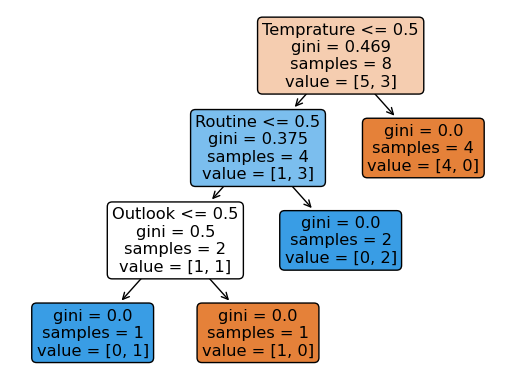

In [18]:
tree.plot_tree(clf, rounded=True, filled=True, feature_names=x.columns.tolist())

In [19]:
clf.predict([[0, 0, 1]])

array(['Yes'], dtype=object)